
| [Nazaj](Vprasanje_2.ipynb) | [Na kazalo](report.ipynb) | [Naprej](Vprasanje_4.ipynb) |
|---|:---:|---:|



## V katerem področju se zgodi največ nesreč, in kje se zgodi največ nesreč povezanih z alkoholom

### X in Y koordinate bom razdelil v meje, vsebovane v kvadratkih, ki jih bom spodaj izračunal

In [86]:
# Reevantni importi
% matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from Orange.data.filter import SameValue
from Orange.data import Table
import numpy as np
from csv import DictReader

In [87]:
# Filtrirani podatki naloženi (crash data filt je isti, ker je tako ali tako cel)
crash1_reader = DictReader(open('data/Crash_Data_1_filt.csv', 'rt', encoding='utf-8'))
crash2_reader = DictReader(open('data/Crash_Data_2_filt_non_rand.csv', 'rt', encoding='utf-8'))
liquor_reader = DictReader(open('data/Liquor_Data_filt_non_rand.csv', 'rt', encoding='utf-8'))

In [88]:
# Pregledam kako vnosi podatkov zgledajo
for crash in crash1_reader:
    print(crash)
    break
print("------------------")
for crash in crash2_reader:
    print(crash)
    break
print("------------------")
for liquor in liquor_reader:
    print(liquor)
    break

OrderedDict([('\ufeffX', '-93.511904910700665'), ('Y', '41.648063161780378'), ('OBJECTID', '1001'), ('CRASH_KEY', '2016902721'), ('CASENUMBER', '2016902721'), ('LECASENUM', '16-452'), ('CRASH_DATE', '2016-01-20T00:00:00.000Z'), ('CRASH_MONTH', '1'), ('CRASH_DAY', '4'), ('TIMESTR', '20:02'), ('DISTRICT', '1'), ('COUNTY_NUMBER', '77'), ('CITYNAME', '132'), ('SYSTEMSTR', 'US 6'), ('LITERAL', 'US 6/HUBBELL AVE/NE RAMP/SPEC CASE/FREDERICK M HUBBELL AVE'), ('FRSTHARM', '33'), ('LOCFSTHRM', '1'), ('CRCOMNNR', '4'), ('MAJCSE', '9'), ('DRUGALC', '8'), ('ECNTCRC', '1'), ('LIGHT', '5'), ('CSRFCND', '1'), ('WEATHER', '1'), ('RCNTCRC', '1'), ('RDTYP', '22'), ('PAVED', '1'), ('WZRELATED', ''), ('CSEV', '5'), ('FATALITIES', '0'), ('INJURIES', '0'), ('MAJINJURY', '0'), ('MININJURY', '0'), ('POSSINJURY', '0'), ('UNKINJURY', '0'), ('PROPDMG', '6000'), ('VEHICLES', '2'), ('TOCCUPANTS', '2'), ('REPORT', '7'), ('XCOORD', '457373'), ('YCOORD', '4610828')])
------------------
OrderedDict([('\ufeffX', '-92.65

### Spodaj bom izračunal meje kvadratkov koordinatnega sistema, s pomočjo minimalnih in maksimalnih koordinatov v podatkih

In [89]:
# Število X Koordinate (UTM NAD 83 Zone 15)
# Število Y Koordinate (UTM NAD 83 Zone 15)
# 
# Računa
crash1_max_X = -1000;
crash1_max_Y = -1000;
crash1_min_X = 1000;
crash1_min_Y = 1000;
for crash in crash1_reader:
    if float(crash["\ufeffX"])>crash1_max_X:
        crash1_max_X=float(crash["\ufeffX"])
    if float(crash["\ufeffX"])<crash1_min_X:
        crash1_min_X=float(crash["\ufeffX"])
    if float(crash["Y"])>crash1_max_Y:
        crash1_max_Y=float(crash["Y"])
    if float(crash["Y"])<crash1_min_Y:
        crash1_min_Y=float(crash["Y"])
print("------------------")
crash2_max_X = -1000;
crash2_max_Y = -1000;
crash2_min_X = 1000;
crash2_min_Y = 1000;
for crash in crash2_reader:
    if float(crash["\ufeffX"])>crash2_max_X:
        crash2_max_X=float(crash["\ufeffX"])
    if float(crash["\ufeffX"])<crash2_min_X:
        crash2_min_X=float(crash["\ufeffX"])
    if float(crash["Y"])>crash2_max_Y:
        crash2_max_Y=float(crash["Y"])
    if float(crash["Y"])<crash2_min_Y:
        crash2_min_Y=float(crash["Y"])
print("Data 1:")
print(str(crash1_min_X)+" , "+str(crash1_max_Y)+"--------"+str(crash1_max_X)+" , "+str(crash1_max_Y))
print("---------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------")
print(str(crash1_min_X)+" , "+str(crash1_min_Y)+"--------"+str(crash1_max_X)+" , "+str(crash1_min_Y))
print("Data 2:")
print(str(crash2_min_X)+" , "+str(crash2_max_Y)+"--------"+str(crash2_max_X)+" , "+str(crash2_max_Y))
print("---------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------")
print(str(crash2_min_X)+" , "+str(crash2_min_Y)+"--------"+str(crash2_max_X)+" , "+str(crash2_min_Y))

------------------
Data 1:
-96.64370824827424 , 43.50108618320072---------92.4040052229149 , 43.50108618320072
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
-96.64370824827424 , 40.2330982959834---------92.4040052229149 , 40.2330982959834
Data 2:
-96.64370824827424 , 43.50100896123742---------92.4040052229149 , 43.50100896123742
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
-----------------------------------------------------------

**Podatki za meje koordinatov so torej sledeči: **

A: 43.5010861832007 , -96.64370824827424   B:  43.50108618320072 , -92.4040052229149


C: 40.2330982959834 , -96.64370824827424    D: 40.2330982959834 , -92.4040052229149



#### Prek google maps sem dobil razdalje od točke do točke : 
###### A - B je 370 kilometrov
###### A - C je 450 kilometrov
###### C - D je 434 kilometrov
###### B - D je 410 kilometrov

In [111]:
difference_crash_x = crash1_max_X - crash1_min_X
difference_crash_y = crash1_max_Y - crash1_min_Y
print(str(difference_crash_x)+" in "+str(difference_crash_y))

4.239703025359333 in 3.2679878872173163


In [118]:
# Razlika med max X in min X, ter razlika med max Y in min Y: 4.239703025359333 in 3.2679878872173163
crash_x_step = difference_crash_x/50
crash_y_step = difference_crash_y/50
print(crash_x_step)
print(crash_y_step)

0.08479406050718666
0.06535975774434633


In [119]:
# Koraki bodo torej po 0.0212 za x in 0.0163 za y
x_positions = []
y_positions = []
key_x = crash1_min_X
key_y = crash1_min_Y
while(key_x<crash1_max_X):
    x_positions.append(key_x)
    key_x = key_x + crash_x_step
while(key_y<crash1_max_Y):
    y_positions.append(key_y)
    key_y = key_y + crash_y_step


In [120]:
# Funkcija da najdem index prostora
def find_index_x(x_coord):
    for index,point in enumerate(x_positions):
        if(index == len(x_positions)-1):
            return -1
        if(point<x_coord and x_coord<x_positions[index+1]):
            return index

def find_range_x(index):
    return [x_positions[index],x_positions[index+1]]

In [121]:
def find_index_y(y_coord):
    for index,point in enumerate(y_positions):
        if(index == len(y_positions)-1):
            return -1
        if(point<y_coord and y_coord<y_positions[index+1]):
            return index

def find_range_y(index):
    return [y_positions[index],y_positions[index+1]]

In [134]:
# Nardiv matrico za koordinate
crash1_reader = DictReader(open('data/Crash_Data_1_filt.csv', 'rt', encoding='utf-8'))
crash2_reader = DictReader(open('data/Crash_Data_2_filt.csv', 'rt', encoding='utf-8'))
w, h = len(x_positions), len(y_positions);
x_coordinates = [0 for x in range(w)]
y_coordinates = [0 for x in range(h)]
coord_matrix = [[0 for x in range(w)] for y in range(h)] 
for crash in crash1_reader:
    x_pos = float(crash["\ufeffX"])
    y_pos = float(crash["Y"])
    arrx = find_index_x(x_pos)
    arry = find_index_y(y_pos)
    x_coordinates[arrx]+=1
    y_coordinates[arry]+=1
    coord_matrix[arry][arrx] += 1
#print(coord_matrix)

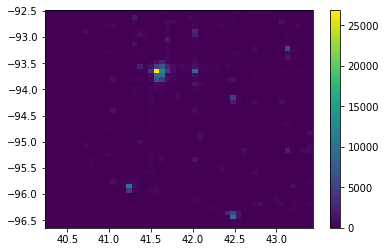

In [135]:

x = x_positions
y = y_positions 
intensity = coord_matrix


x, y = np.meshgrid(x, y)


intensity = np.array(intensity)


plt.pcolormesh(y, x, intensity)
plt.colorbar() 
plt.show() 

** Največje žarišče zgleda da je pri 41.5, -93.5 , kar pa je mesto Des Moines, največje mesto v Iowi, tukaj zgleda da so podatki pravilni, veliko je tudi 41.25, -96.1, kar pa tudi zgleda da je pravilno, kajti to je mesto Omaha  **


** Sedaj pa za največ nesreč povezanih z alkoholu, to bom naredil tako da bom upošteval samo podatke, ki imajo rezultat alkohola v krvi več kot 0 **

In [141]:
# Nardiv matrico za koordinate
crash1_reader = DictReader(open('data/Crash_Data_1_filt.csv', 'rt', encoding='utf-8'))
crash2_reader = DictReader(open('data/Crash_Data_2_filt.csv', 'rt', encoding='utf-8'))
w, h = len(x_positions), len(y_positions);
x_coordinates = [0 for x in range(w)]
y_coordinates = [0 for x in range(h)]
coord_matrix = [[0 for x in range(w)] for y in range(h)] 
for crash in crash2_reader:
    alcohol = float(crash["ALCRESULT"])
    if(alcohol>0):
        x_pos = float(crash["\ufeffX"])
        y_pos = float(crash["Y"])
        arrx = find_index_x(x_pos)
        arry = find_index_y(y_pos)
        x_coordinates[arrx]+=1
        y_coordinates[arry]+=1
        coord_matrix[arry][arrx] += 1
#print(coord_matrix)

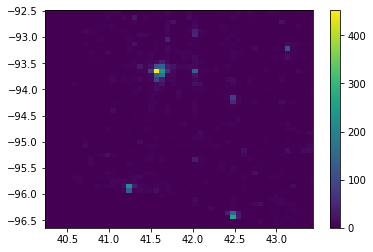

In [142]:
x = x_positions
y = y_positions 
intensity = coord_matrix


x, y = np.meshgrid(x, y)


intensity = np.array(intensity)


plt.pcolormesh(y, x, intensity)
plt.colorbar() 
plt.show() 

** Podatki so bolj kot ne podobni, še vedno so glavna 3 žarišča Des moines, omaha in sioux city, ki pa ima za svojo majhno velikost kar nadpovprečno število prometnih nesreč povezanih z alkoholom**